In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Data Collection

In [3]:
news_df = pd.read_csv('WELFake_Dataset.csv')
news_df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
news_df.shape

(72134, 4)

In [5]:
fake_news_count = news_df[news_df['label'] == 0].shape[0]
real_news_count = news_df[news_df['label'] == 1].shape[0]

print("Number of Fake News:", fake_news_count)
print("Number of Real News:", real_news_count)



Number of Fake News: 35028
Number of Real News: 37106


In [6]:
news_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


# Data Cleaning

In [7]:
news_df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [8]:
news_df=news_df.dropna()   # dropping missing values

In [9]:
news_df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
news_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71537 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  71537 non-null  int64 
 1   title       71537 non-null  object
 2   text        71537 non-null  object
 3   label       71537 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


In [11]:
# merege all content together content = title + text
news_df['content'] = news_df['title']+' '+news_df['text']

In [12]:
news_df

,Unnamed: 0,title,text,label,content
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...
...,...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolog...
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,Trump tussle gives unpopular Mexican leader mu...


In [13]:
# Shuffling
news_df = news_df.sample(frac=1)
news_df.reset_index(inplace=True)
news_df.drop(["index"], axis=1, inplace=True)

In [14]:
news_df.drop_duplicates(subset=['content'], inplace=True)

In [15]:
news_df.reset_index(inplace=True)
news_df.drop(["index"], axis=1, inplace=True)

In [16]:
news_df

,Unnamed: 0,title,text,label,content
0,46760,South Korea to resume building two new nuclear...,SEOUL (Reuters) - South Korea will resume the ...,0,South Korea to resume building two new nuclear...
1,29546,Netanyahu signals Israel will act with free ha...,JERUSALEM (Reuters) - Prime Minister Benjamin ...,0,Netanyahu signals Israel will act with free ha...
2,28977,China's Xi fetes Trump on first day of Beijing...,BEIJING (Reuters) - With lavish pageantry and ...,0,China's Xi fetes Trump on first day of Beijing...
3,71088,Sometimes the road to diet change can be fun,Sometimes the road to diet change can be fun A...,1,Sometimes the road to diet change can be fun S...
4,25662,"Trump, Taiwan and China: The Controversy, Expl...",When Donald J. Trump spoke on the phone with...,0,"Trump, Taiwan and China: The Controversy, Expl..."
...,...,...,...,...,...
63116,13086,Today in History: Harry Truman Defies State De...,"On May 14, 1948, U. S. President Harry Truman ...",0,Today in History: Harry Truman Defies State De...
63117,18460,"Mired in third, Marco Rubio prepares for a lon...",At a Capitol Hill social club earlier this mon...,0,"Mired in third, Marco Rubio prepares for a lon..."
63118,18261,North Korea says Trump begged for a war during...,SEOUL (Reuters) - North Korea said on Saturday...,0,North Korea says Trump begged for a war during...
63119,35694,"Showgirls, Pastrami and Candor: Gloria Steinem...",Gloria Steinem started her career as a C. I. A...,0,"Showgirls, Pastrami and Candor: Gloria Steinem..."


In [17]:
# Convert all text to lowercase
news_df['content'] = news_df['content'].apply(lambda x: x.lower())

In [18]:
# Remove URLs
news_df['content'] = news_df['content'].apply(lambda x: re.sub(r'http\S+', '', x))

In [19]:
# Remove punctuation
news_df['content'] = news_df['content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [20]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
news_df['content'] = news_df['content'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

In [21]:
# Lemmatize words
lemmatizer = WordNetLemmatizer()
news_df['content'] = news_df['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

In [22]:
news_df

,Unnamed: 0,title,text,label,content
0,46760,South Korea to resume building two new nuclear...,SEOUL (Reuters) - South Korea will resume the ...,0,south korea resume building two new nuclear re...
1,29546,Netanyahu signals Israel will act with free ha...,JERUSALEM (Reuters) - Prime Minister Benjamin ...,0,netanyahu signal israel act free hand syria je...
2,28977,China's Xi fetes Trump on first day of Beijing...,BEIJING (Reuters) - With lavish pageantry and ...,0,china xi fete trump first day beijing trip bei...
3,71088,Sometimes the road to diet change can be fun,Sometimes the road to diet change can be fun A...,1,sometimes road diet change fun sometimes road ...
4,25662,"Trump, Taiwan and China: The Controversy, Expl...",When Donald J. Trump spoke on the phone with...,0,trump taiwan china controversy explained new y...
...,...,...,...,...,...
63116,13086,Today in History: Harry Truman Defies State De...,"On May 14, 1948, U. S. President Harry Truman ...",0,today history harry truman defies state depart...
63117,18460,"Mired in third, Marco Rubio prepares for a lon...",At a Capitol Hill social club earlier this mon...,0,mired third marco rubio prepares long drawnout...
63118,18261,North Korea says Trump begged for a war during...,SEOUL (Reuters) - North Korea said on Saturday...,0,north korea say trump begged war asia trip seo...
63119,35694,"Showgirls, Pastrami and Candor: Gloria Steinem...",Gloria Steinem started her career as a C. I. A...,0,showgirl pastrami candor gloria steinem new yo...


In [23]:
news_df['content']

0        south korea resume building two new nuclear re...
1        netanyahu signal israel act free hand syria je...
2        china xi fete trump first day beijing trip bei...
3        sometimes road diet change fun sometimes road ...
4        trump taiwan china controversy explained new y...
                               ...                        
63116    today history harry truman defies state depart...
63117    mired third marco rubio prepares long drawnout...
63118    north korea say trump begged war asia trip seo...
63119    showgirl pastrami candor gloria steinem new yo...
63120    wow john kerry said prof inability secretary s...
Name: content, Length: 63121, dtype: object

# EDA

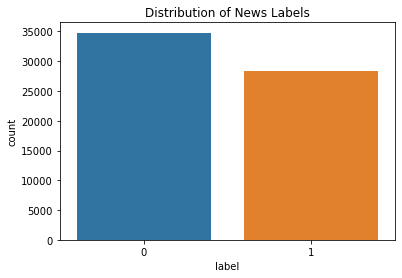

In [24]:
# EDA
# Plot the distribution of the target variable
sns.countplot(x='label', data=news_df)
plt.title('Distribution of News Labels')
plt.show()

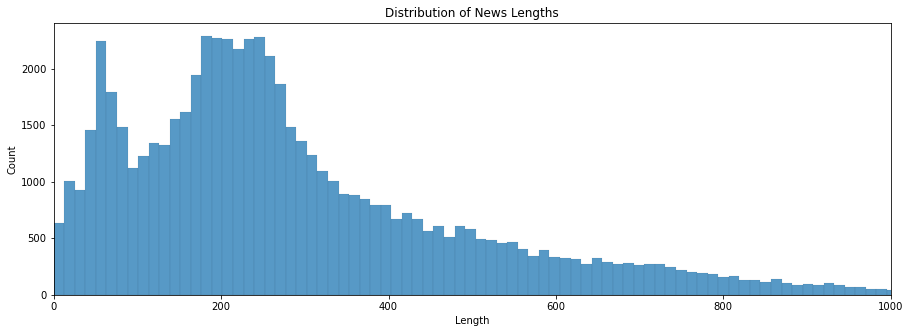

In [25]:
# Plot the distribution of news lengths
news_df['length'] = news_df['content'].apply(lambda x: len(x.split()))
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(x='length', data=news_df)
plt.title('Distribution of News Lengths')
plt.xlabel('Length')
plt.xlim(0, 1000)
plt.show()

In [26]:
news_df

,Unnamed: 0,title,text,label,content,length
0,12931,WATCH: PRESIDENT TRUMP Hilariously Exposes Hyp...,"Before Trump, Democrats and their allies in th...",1,watch president trump hilariously expose hypoc...,130
1,47258,U.S. and India Mark a New Moment in Relations ...,WASHINGTON — Prime Minister Narendra Modi o...,0,u india mark new moment relation narendra modi...,679
2,42362,The Firefighter’s Prophecy: Is Trump God’s Man?,The Firefighter’s Prophecy: Is Trump God’s Man...,1,firefighter prophecy trump god man firefighter...,111
3,30314,Suspect in 4 gruesome D.C. killings might not ...,Authorities said in court papers Friday that t...,0,suspect 4 gruesome dc killing might acted alon...,786
4,48327,Republican Trump releases healthcare proposals,WASHINGTON (Reuters) - U.S. Republican preside...,0,republican trump release healthcare proposal w...,259
...,...,...,...,...,...,...
63116,71052,House Financial Services chairman sees Dodd-Fr...,WASHINGTON (Reuters) - Reform of Wall Street r...,0,house financial service chairman see doddfrank...,60
63117,60555,Obama Delivers Private Letter to Trump as Clin...,In anticipation of the inauguration of Donal...,0,obama delivers private letter trump clinton bu...,184
63118,29364,“Weinergate”,https://www.lewrockwell.com/lrc-blog/weinergat...,1,weinergate name given latest clinton crime fam...,17
63119,25622,"Flagged Two Times in 2014, Ahmad Rahami Passed...",When Ahmad Khan Rahami returned in March 2014 ...,0,flagged two time 2014 ahmad rahami passed scru...,904


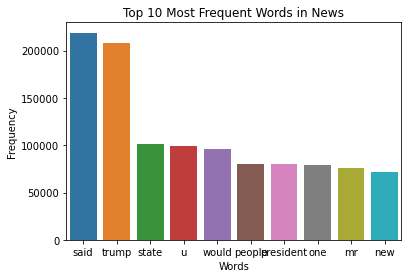

In [27]:
# Plot the word frequency distribution
word_freq = pd.Series(' '.join(news_df['content']).split()).value_counts()[:10]
sns.barplot(x=word_freq.index, y=word_freq.values)
plt.title('Top 10 Most Frequent Words in News')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Separating the data & label

In [24]:
# extracting all independant variables except last column i.e. label
X = news_df['content']
# extracting all dependant variables last column i.e. label
y = news_df['label']

In [25]:
print(X)

0        south korea resume building two new nuclear re...
1        netanyahu signal israel act free hand syria je...
2        china xi fete trump first day beijing trip bei...
3        sometimes road diet change fun sometimes road ...
4        trump taiwan china controversy explained new y...
                               ...                        
63116    today history harry truman defies state depart...
63117    mired third marco rubio prepares long drawnout...
63118    north korea say trump begged war asia trip seo...
63119    showgirl pastrami candor gloria steinem new yo...
63120    wow john kerry said prof inability secretary s...
Name: content, Length: 63121, dtype: object


# converting the textual data to numerical data

In [26]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [27]:
import pickle


with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vector, file)

In [28]:
print(X)

  (0, 332852)	0.022777471399245325
  (0, 332546)	0.04614497634442354
  (0, 330695)	0.04679710940515998
  (0, 327376)	0.020580567551133133
  (0, 318031)	0.04297267280449776
  (0, 317964)	0.05151916038842964
  (0, 316953)	0.052154119983467216
  (0, 315420)	0.10384027448741785
  (0, 312529)	0.07573482056601863
  (0, 310931)	0.025799808198584396
  (0, 307085)	0.03302441643877439
  (0, 306502)	0.06339218162305932
  (0, 306488)	0.035302269269743135
  (0, 306320)	0.057277647962299415
  (0, 305409)	0.019279621142305355
  (0, 303257)	0.04531952499547599
  (0, 301907)	0.03420086017361354
  (0, 293605)	0.04588223362240313
  (0, 293463)	0.0433009889179034
  (0, 287672)	0.04068189252743016
  (0, 287117)	0.02378712133613687
  (0, 283750)	0.12538380307167188
  (0, 283641)	0.029033509075993082
  (0, 282315)	0.05612032964739608
  (0, 279434)	0.09696447234527267
  :	:
  (63119, 16244)	0.023747829437868115
  (63119, 15121)	0.010783853945714253
  (63119, 12232)	0.013710543991580428
  (63119, 9906)	0.01533

# Splitting the dataset to training & test data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,  random_state=42)

In [30]:
X_train.shape

(50496, 365039)

In [31]:
X_test.shape

(12625, 365039)

# Training the Model: Decision Tree

In [32]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [33]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
import pickle

# Assuming you have trained your model and stored it in the 'dt_model' variable

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)


In [36]:
# on training set
Y_train_pred = dt_model.predict(X_train)
print(accuracy_score(Y_train_pred,Y_train))

1.0


In [37]:
# on testing set
Y_test_pred = dt_model.predict(X_test)
print(accuracy_score(Y_test_pred,Y_test))

0.9240396039603961


In [38]:
print(metrics.classification_report(Y_test_pred,Y_test))
print(metrics.confusion_matrix(Y_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6879
           1       0.92      0.91      0.92      5746

    accuracy                           0.92     12625
   macro avg       0.92      0.92      0.92     12625
weighted avg       0.92      0.92      0.92     12625

[[6421  458]
 [ 501 5245]]


# Regularization 

In [58]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=22, min_samples_split=400 )
dt_model.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=22, min_samples_split=400)

In [59]:
# on testing set
Y_test_pred = dt_model.predict(X_test)
print(accuracy_score(Y_test_pred,Y_test))

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_test_pred)
print("Mean Squared Error: ", mse)

0.9270495049504951
Mean Squared Error:  0.07295049504950495


In [60]:
print(metrics.classification_report(Y_test_pred,Y_test))
print(metrics.confusion_matrix(Y_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6743
           1       0.93      0.91      0.92      5882

    accuracy                           0.93     12625
   macro avg       0.93      0.93      0.93     12625
weighted avg       0.93      0.93      0.93     12625

[[6372  371]
 [ 550 5332]]


In [61]:
input_data = X_test[0]
prediction = dt_model.predict(input_data)

In [62]:
if prediction[0] == 1:
    print('The News Is Real')
else:
    print('The News is Fake')

The News Is Real


In [63]:
news_df['text'][2]

'BERLIN (Reuters) - German drag queens are using satire to spoof a hard-right party s anti-Islam election campaign, and German voters are loving it. They have formed Transvestites for Germany, or TfD, a name that bears an uncanny resemblance to Alternative for Germany (AfD), the name of Germany s leading right-wing party, and launched a Facebook campaign that has almost 7,000 followers. The AfD s election campaign focuses on messages that Islamic customs don t belong in Germany. That has left a bad taste with many Germans, and TfD saw an opportunity to use drag fashion and wit to mock the AfD s own election placards. The AfD posters feature white German women in bikinis or raising wine glasses, with captions like  Burka? I m into bikinis  and  Burka? I m into Burgundy . The posters are emblazoned with the party s election motto:  I dare you, Germany!  The TfD version of the posters uses the AfD s light blue party color but replaces the anti-immigrant party s red arrow with red stiletto

In [ ]:
import streamlit as st

In [ ]:
# website
st.title('Fake News Detector')
input_text = st.text_input('Enter news Article')